In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

%matplotlib inline
sns.set(style='white')
colors = [['dimgray', 'forestgreen', 'red', 'navy', 'royalblue', 'maroon'],
          ['dimgray', 'forestgreen', 'red', 'maroon', 'royalblue', 'navy', 'purple'],
          ['forestgreen', 'red', 'royalblue']]

np.random.seed(0)

In [2]:
# Loading the data

dataset_3 = pd.read_csv('data/cluster_ds3.csv',
                  header=0,
                  index_col=None)

dataset_4 = pd.read_csv('data/cluster_ds4.csv',
                  header=0,
                  index_col=None)

dataset_5 = pd.read_csv('data/cluster_ds5.csv',
                  header=0,
                  index_col=None)

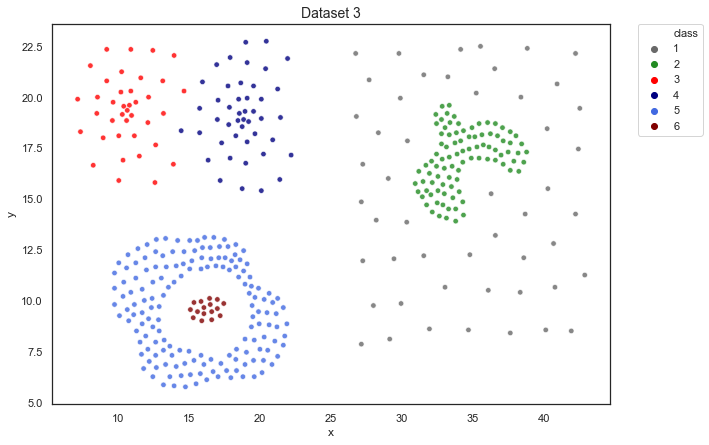

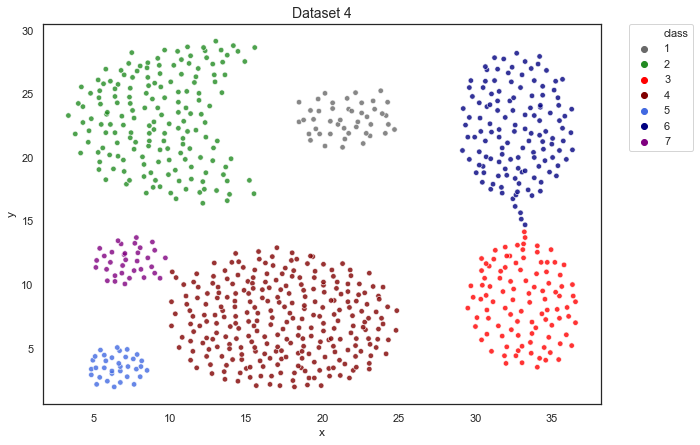

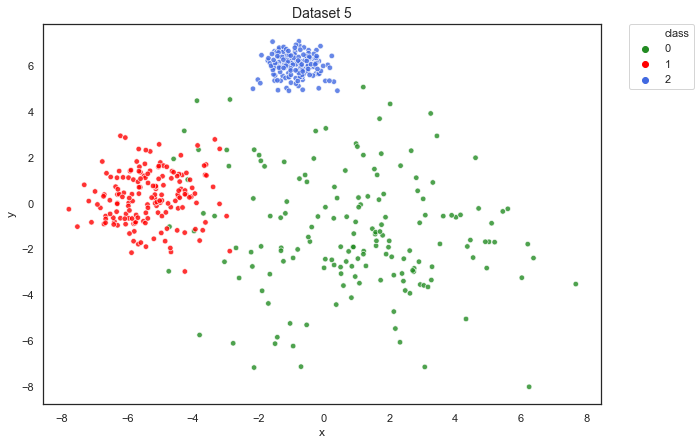

In [3]:
# Original clusters

fig = plt.figure(figsize=[10, 7])
s = sns.scatterplot(data=dataset_3,
                    x='x',
                    y='y',
                    hue='class',
                    s=30, alpha=0.8,
                    legend='full',
                    palette=colors[0])
l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
t = plt.title('Dataset 3', fontsize=14)
plt.show()
plt.close()

fig = plt.figure(figsize=[10, 7])
s = sns.scatterplot(data=dataset_4,
                    x='x',
                    y='y',
                    hue='class',
                    s=30, alpha=0.8,
                    legend='full',
                    palette=colors[1])
l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
t = plt.title('Dataset 4', fontsize=14)
plt.show()
plt.close()

fig = plt.figure(figsize=[10, 7])
s = sns.scatterplot(data=dataset_5,
                    x='x',
                    y='y',
                    hue='class',
                    s=30, alpha=0.8,
                    legend='full',
                    palette=colors[2])
l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
t = plt.title('Dataset 5', fontsize=14)
plt.show()
plt.close()

In [4]:
# Data Analysis

print('=> Dataset 3\n')
dataset_3.info()
print('\n=> Dataset 4\n')
dataset_4.info()
print('\n=> Dataset 5\n')
dataset_5.info()

=> Dataset 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 3 columns):
x        399 non-null float64
y        399 non-null float64
class    399 non-null int64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB

=> Dataset 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 3 columns):
x        788 non-null float64
y        788 non-null float64
class    788 non-null int64
dtypes: float64(2), int64(1)
memory usage: 18.6 KB

=> Dataset 5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
x        500 non-null float64
y        500 non-null float64
class    500 non-null int64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [5]:
print('\n=> Dataset 3')
dataset_3.describe()
print('\n=> Dataset 4')
dataset_4.describe()
print('\n=> Dataset 5')
dataset_5.describe()


=> Dataset 3

=> Dataset 4

=> Dataset 5


x           y       class
count  500.000000  500.000000  500.000000
mean    -1.762312    1.651048    0.998000
std      3.076568    3.566898    0.816903
min     -7.779000   -8.029000    0.000000
25%     -4.657750   -0.872750    0.000000
50%     -1.232000    0.942500    1.000000
75%     -0.174500    5.706500    2.000000
max      7.674000    7.083000    2.000000

In [6]:
# Data preprocessing

def feature_matrix(df):
    return df[['x', 'y']].to_numpy()

In [7]:
def plot_cluster(df, k, algorithm):
    
    fig = plt.figure(figsize=[14, 5])
    
    sp1 = fig.add_subplot(121)
    sc1 = sns.scatterplot(data=df,
                          x='x',
                          y='y',
                          hue='class',
                          s=30, alpha=0.8,
                          legend='full',
                          palette=sns.color_palette(n_colors=k))
    l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    sp2 = fig.add_subplot(122)
    sc2 = sns.scatterplot(data=df,
                    x='x',
                    y='y',
                    hue=algorithm,
                    s=30, alpha=0.8,
                    legend='full',
                    palette=sns.color_palette(n_colors=k))
    l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    sp1.title.set_text('Original clusters')
    sp2.title.set_text('Predicted clusters')
    
    t = plt.suptitle(algorithm, fontsize=20)
    plt.tight_layout()
    t.set_y(0.95)
    plt.subplots_adjust(top=0.85)
    plt.show()
    plt.close()

In [8]:
# Basic Clustering Algorithms
# Required for DB Scan
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import euclidean
from scipy.stats import pearsonr
from matplotlib.colors import ListedColormap


def cluster(df, k, kn):
    kmeans = KMeans(n_clusters=k, n_init=50).fit(feature_matrix(df))
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    df['kmeans'] = labels
    #plot_cluster(df, k, 'kmeans')
    
    aggcluster = AgglomerativeClustering(n_clusters=k).fit(feature_matrix(df))
    labels = aggcluster.labels_
    df['agg'] = labels
    #plot_cluster(df, k, 'agg')
    
    # Computing hyperparameters minpts and eps for DBSCAN
    
    # Create a NearestNeighbors object, fit the data, then get the 4 nearest neighbors
    nbrs = NearestNeighbors(n_neighbors=kn).fit(df)
    distances, indices = nbrs.kneighbors(df)
    #print(distances)

    # Get the indexes of the array sorted by the 4th nearest neighbor
    sorted_ix = distances[:,kn-1].argsort()
    #print(sorted_ix)

    # Extract the plot y values
    px = list(range(len(distances)))
    py = distances[sorted_ix,kn-1]
    
    # Finding the knee point using vector projection
    N = len(py)

    # Coordinates of all points on the curve
    points_along_curve = np.column_stack([px, py])

    # get the first point (origin)
    first_point = points_along_curve[0]

    # vector we're projecting onto
    b = points_along_curve[-1] - points_along_curve[0]

    # length of b
    b_norm = np.linalg.norm(b)

    b_hat = b / b_norm

    # list of vectors (from first_point to every point along the curve)
    a = points_along_curve - first_point

    # scalar projection of a onto b:
    a_1_norm = np.dot(a, b_hat)
    a_1      = np.outer(b_hat, a_1_norm).T

    # vector rejection:
    a_2 = a - a_1

    # Find the longest vector in a_2
    # That is, the longest projection onto line b
    best_ix = np.argmax(np.linalg.norm(a_2, axis=1))
    best_eps = py[best_ix]

    print("Knee: n={:d}, y={:.2f}".format(px[best_ix], best_eps))
    
    # Add code here to compute the values for eps and min_samples for the next line
    # Plot 'em
    fig = plt.figure(figsize=(6, 6), dpi=100)
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(px, py, linestyle='-', linewidth=1)
    ax.plot(px[best_ix], py[best_ix], marker='.', c='red', markersize=5)
    ax.text(px[best_ix]-10, py[best_ix]+0.05, s='n={}, eps={:.2f}'.format(best_ix, best_eps), color='red', horizontalAlignment='right')
    ax.set_title('4th nearest neighbor distance')
    ax.set_xlabel('Instances (sorted by Kth nearest neighbor distance)')
    ax.set_ylabel('Eps')
    ax.grid()

    plt.show()
    
    # Cluster points using DBscan
    db = DBSCAN(eps=best_eps, min_samples=kn)
    y = db.fit_predict(df)
    print("We obtained {} clusters.".format(max(y)+1))
    
    # Custom colormap
    # The 0th color is gray, for noise points
    mycmap = ListedColormap([
        '#000000', '#e6194b', '#3cb44b', '#ffe119', 
        '#4363d8', '#f58231', '#911eb4', '#46f0f0', 
        '#f032e6', '#bcf60c', '#fabebe', '#008080', 
        '#e6beff', '#9a6324', '#fffac8', '#800000', 
        '#aaffc3', '#808000', '#ffd8b1', '#000075', 
        '#808080'
    ], name='mhb1', N=None)
    
    # Make pretty plot
    fig = plt.figure(figsize=(5,5), dpi=100)
    ax = fig.add_subplot(1, 1, 1, aspect=1)
    ax.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='.', c=y, s=20, edgecolor='None', cmap=mycmap)
    ax.set_title('Clustered points')
    plt.show()
    
    #labels = db.labels_
    #df['dbscan'] = labels
    #c = sns.color_palette('cubehelix', n_colors=len(set(labels)))

Knee: n=307, y=2.96


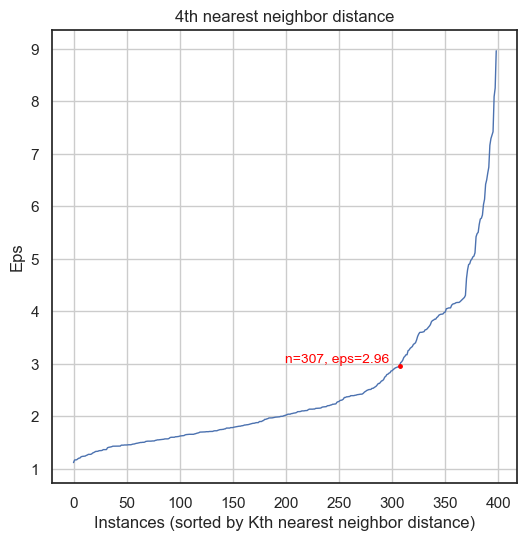

We obtained 5 clusters.


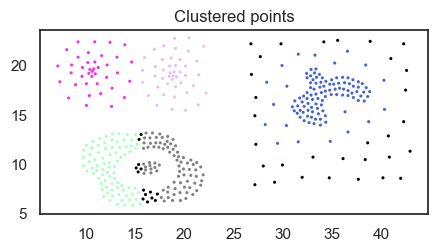

Knee: n=741, y=1.18


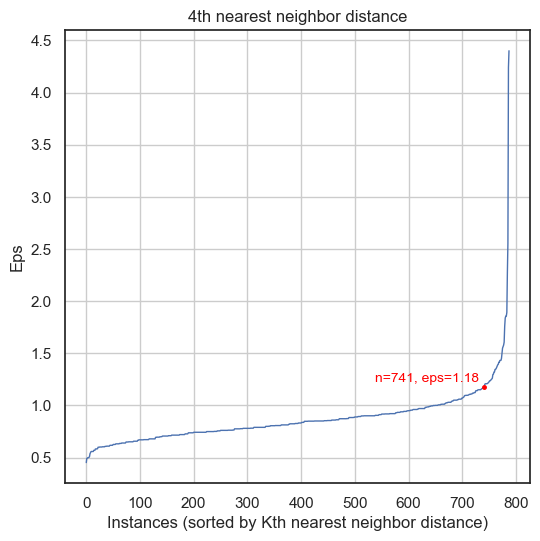

We obtained 9 clusters.


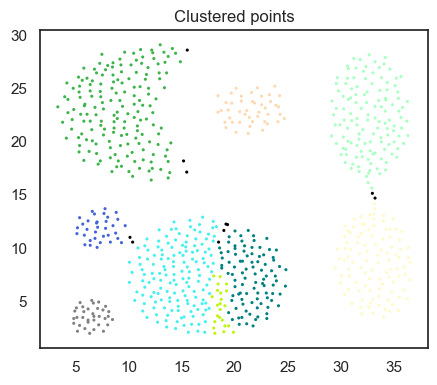

Knee: n=458, y=1.08


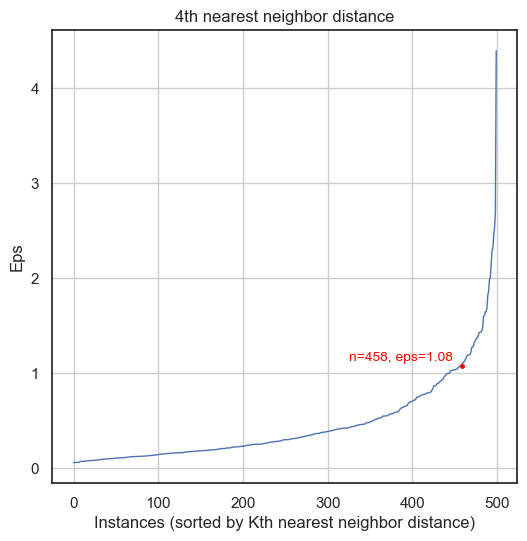

We obtained 5 clusters.


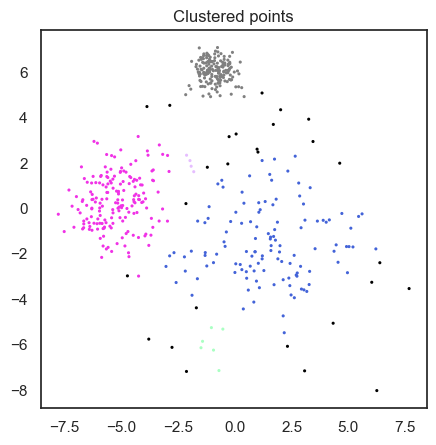

In [9]:
cluster(dataset_3, 6, 18)
cluster(dataset_4, 7, 4)
cluster(dataset_5, 3, 4)

In [10]:
#from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

def sil(df):
    for K in range(2,7):

        # Cluster using Kmeans
        kmeans = KMeans(init='random', n_clusters=K)
        y = kmeans.fit_predict(df)

        # Create side-by-side plots
        fig = plt.figure(figsize=(12, 4), dpi=100)
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)

        # ------------------------------------------
        # The left subplot is the silhouette plot
        # ------------------------------------------

        ax1.set_xlim([-0.1, 1.0])
        vertical_spacing = (K+1)*10 # extra spacing to separate the silhouettes
        ax1.set_ylim([0, len(df) + vertical_spacing])

        # The silhouette_score gives the average value for all the samples.
        silhouette_avg = silhouette_score(df, y)
        print("For K = {}, the average silhouette score is {:.3f}".format(K, silhouette_avg))

        # Compute the silhouette scores for each instance/sample/object
        sample_silhouette_values = silhouette_samples(df, y)

        y_lower = 10
        for i in range(K):
            # Aggregate and sort the silhouette scores for samples in cluster i
            ith_cluster_silhouette_values = sample_silhouette_values[y==i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # color setup
            color = cm.nipy_spectral(float(i) / K)

            # Fill the area between two curves
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                0, ith_cluster_silhouette_values,
                facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("Silhouette Plot")
        ax1.set_xlabel("Silhouette Score")
        ax1.set_ylabel("Cluster Label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # ------------------------------------------
        # The right plot shows the actual clusters formed
        # ------------------------------------------

        colors = cm.nipy_spectral(y.astype(float) / K)
        ax2.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

        # Mark the cluster centers
        centers = kmeans.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='+', c="black", alpha=1, s=200, edgecolor='k')

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

        # Label the cluster centers
        for i, c in enumerate(centers):
            cl = '${}$'.format(i)
            ax2.scatter(c[0], c[1], marker=cl, alpha=1, s=50, c='k', edgecolor='')

        ax2.set_title("Clustered Data")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle("Silhouette analysis for KMeans clustering with K = {}".format(K),
                     fontsize=14, fontweight='bold')

        plt.show()

For K = 2, the average silhouette score is 0.620


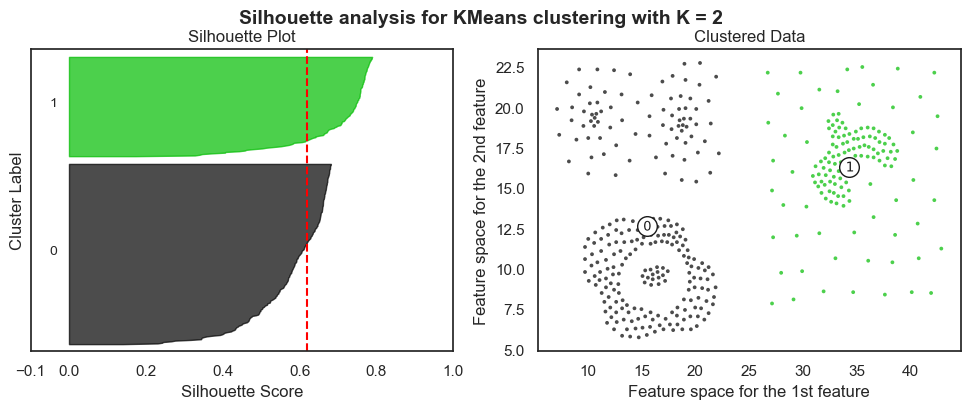

For K = 3, the average silhouette score is 0.551


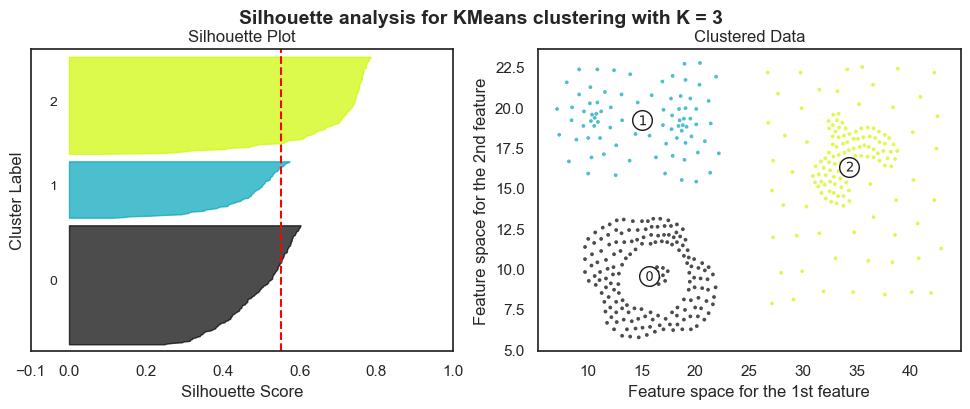

For K = 4, the average silhouette score is 0.555


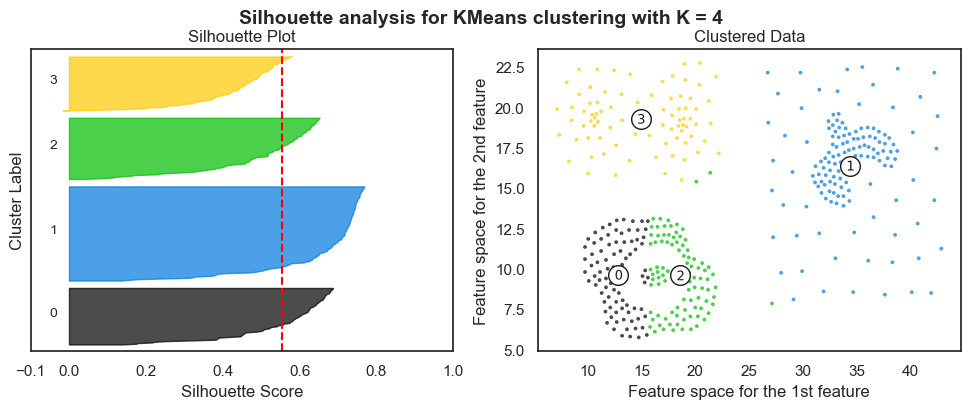

For K = 5, the average silhouette score is 0.581


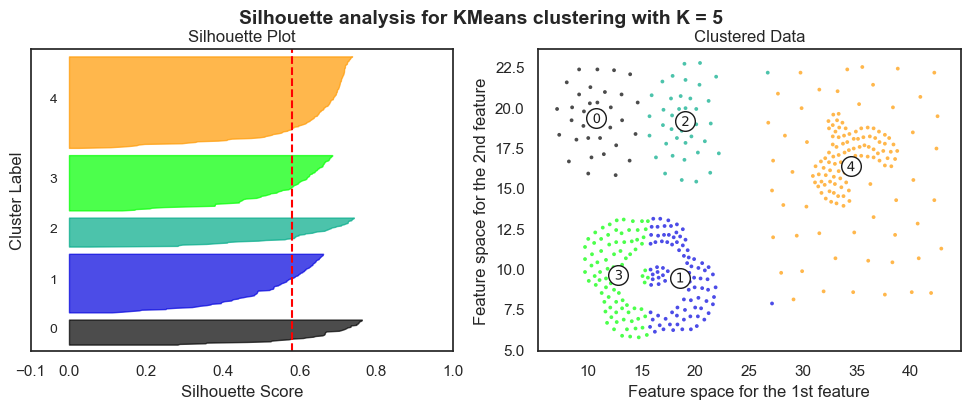

For K = 6, the average silhouette score is 0.504


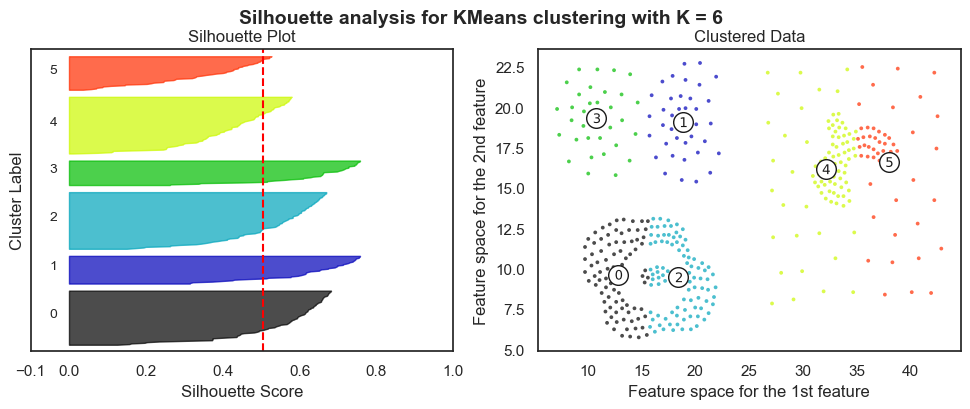

For K = 2, the average silhouette score is 0.444


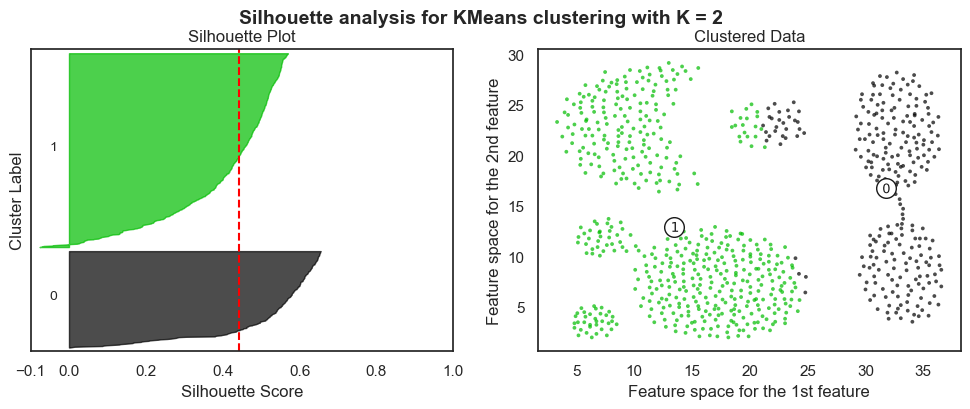

For K = 3, the average silhouette score is 0.519


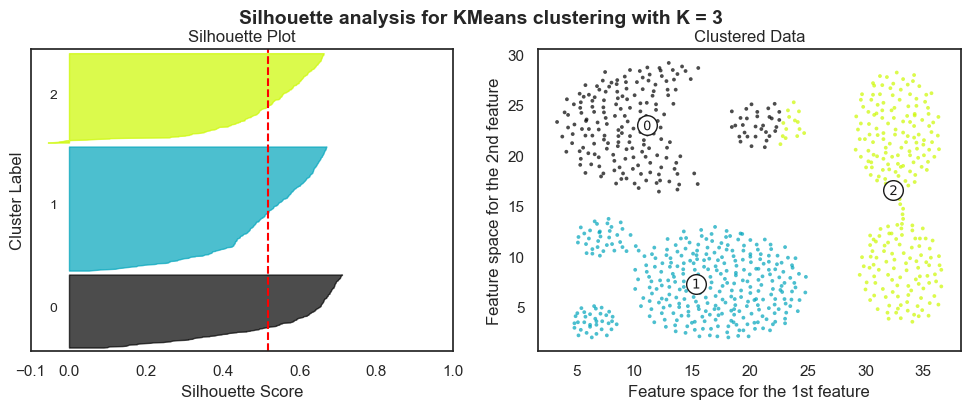

For K = 4, the average silhouette score is 0.530


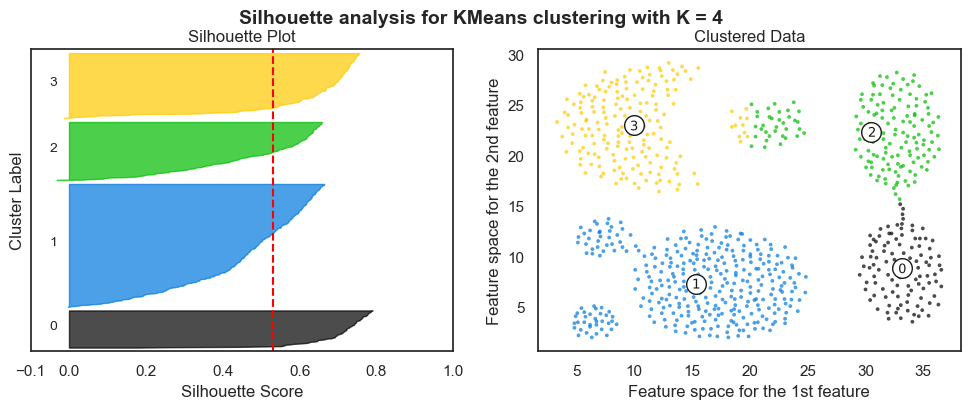

For K = 5, the average silhouette score is 0.495


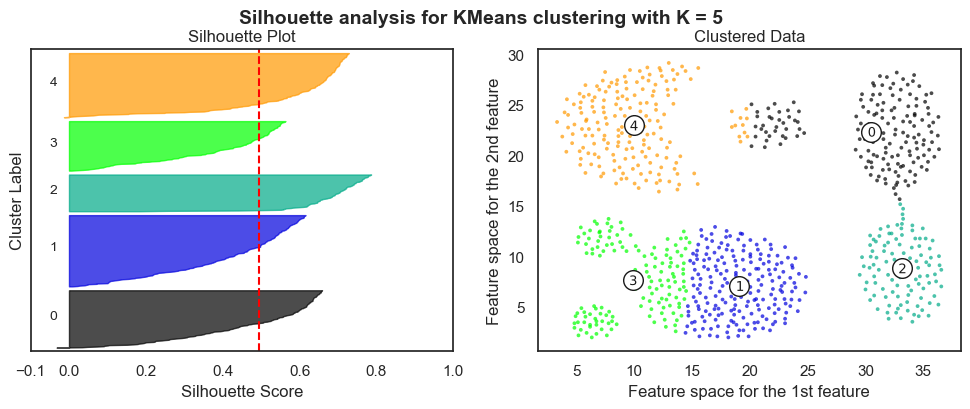

For K = 6, the average silhouette score is 0.526


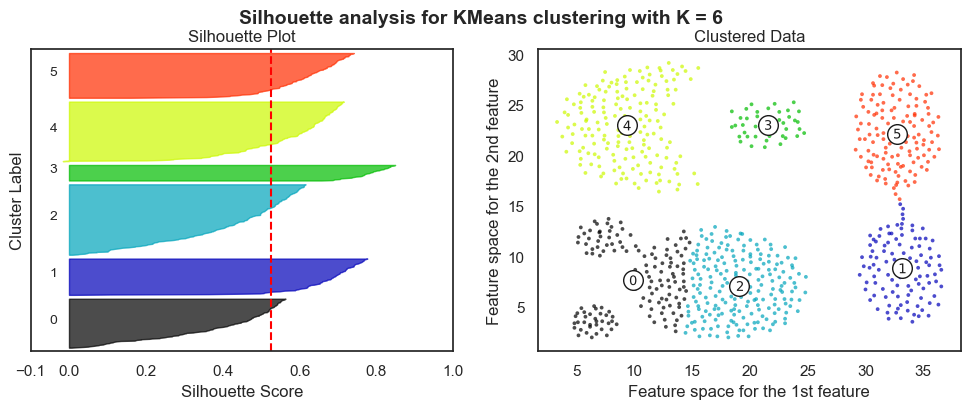

For K = 2, the average silhouette score is 0.518


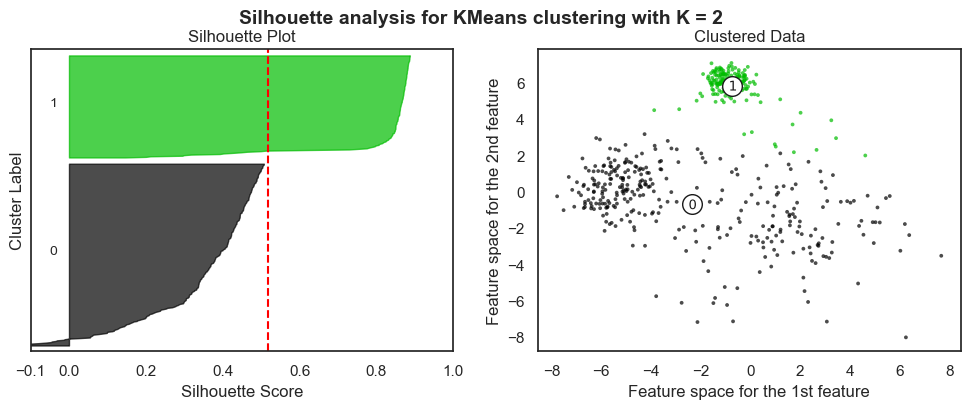

For K = 3, the average silhouette score is 0.672


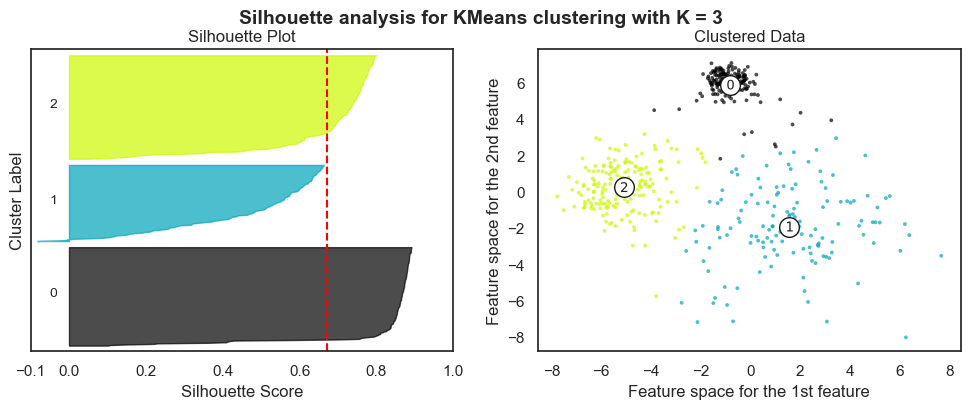

For K = 4, the average silhouette score is 0.617


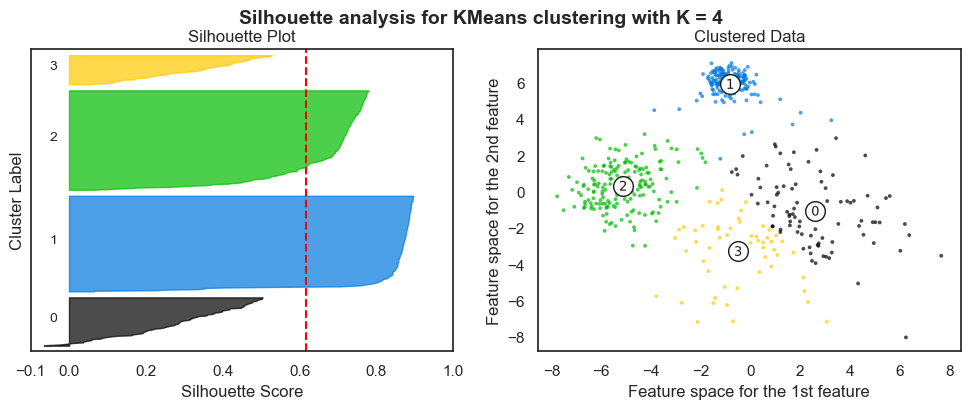

For K = 5, the average silhouette score is 0.620


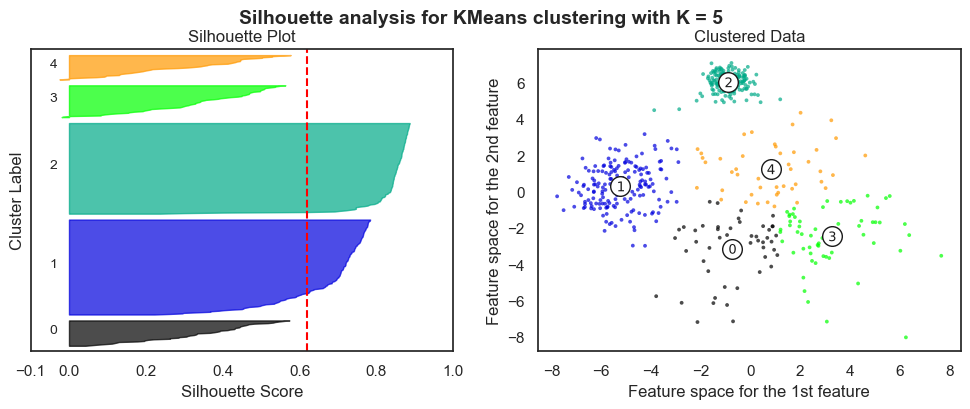

For K = 6, the average silhouette score is 0.505


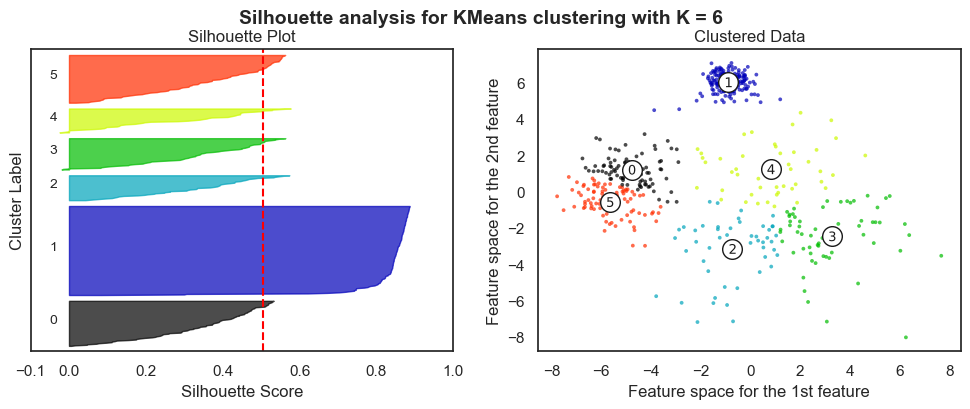

In [11]:
sil(dataset_3)
sil(dataset_4)
sil(dataset_5)

In [30]:
def sil_agg(df):
    for K in range(2,7):

        # Cluster using agg
        X=feature_matrix(df)
        aggcluster = AgglomerativeClustering(n_clusters=K)
        
        y = aggcluster.fit_predict(X)
        #labels = aggcluster.labels_
        #df['agg'] = labels

        # Create side-by-side plots
        fig = plt.figure(figsize=(12, 4), dpi=100)
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(1, 2, 2)

        # ------------------------------------------
        # The left subplot is the silhouette plot
        # ------------------------------------------

        ax1.set_xlim([-0.1, 1.0])
        vertical_spacing = (K+1)*10 # extra spacing to separate the silhouettes
        ax1.set_ylim([0, len(X) + vertical_spacing])

        # The silhouette_score gives the average value for all the samples.
        silhouette_avg = silhouette_score(X, y)
        print("For K = {}, the average silhouette score is {:.3f}".format(K, silhouette_avg))

        # Compute the silhouette scores for each instance/sample/object
        sample_silhouette_values = silhouette_samples(X, y)

        y_lower = 10
        for i in range(K):
            # Aggregate and sort the silhouette scores for samples in cluster i
            ith_cluster_silhouette_values = sample_silhouette_values[y==i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # color setup
            color = cm.nipy_spectral(float(i) / K)

            # Fill the area between two curves
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                0, ith_cluster_silhouette_values,
                facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("Silhouette Plot")
        ax1.set_xlabel("Silhouette Score")
        ax1.set_ylabel("Cluster Label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # ------------------------------------------
        # The right plot shows the actual clusters formed
        # ------------------------------------------

        colors = cm.nipy_spectral(y.astype(float) / K)
        ax2.scatter(df.iloc[:, 0], df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

        # Mark the cluster centers
        #centers = aggcluster.cluster_centers_
        #ax2.scatter(centers[:, 0], centers[:, 1], marker='+', c="black", alpha=1, s=200, edgecolor='k')

        # Draw white circles at cluster centers
        #ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

        # Label the cluster centers
        #for i, c in enumerate(centers):
        #    cl = '${}$'.format(i)
        #    ax2.scatter(c[0], c[1], marker=cl, alpha=1, s=50, c='k', edgecolor='')

        ax2.set_title("Clustered Data")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle("Silhouette analysis for Agglomerative clustering with n_clusters = {}".format(K),
                     fontsize=14, fontweight='bold')

        plt.show()

For K = 2, the average silhouette score is 0.638


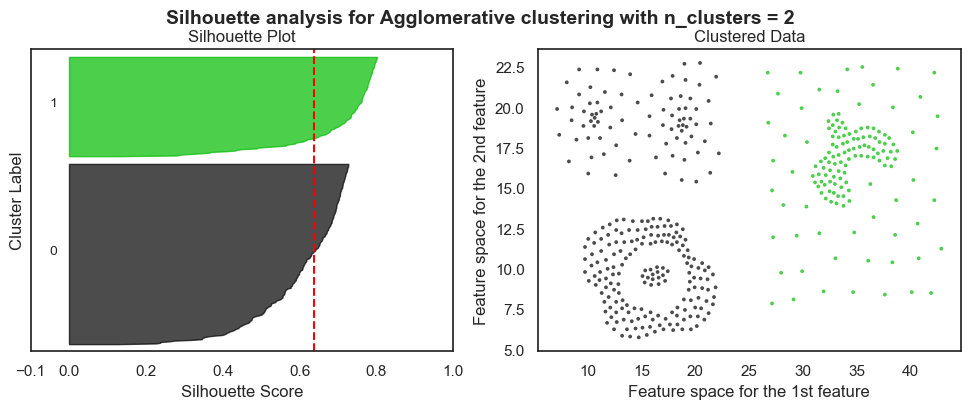

For K = 3, the average silhouette score is 0.576


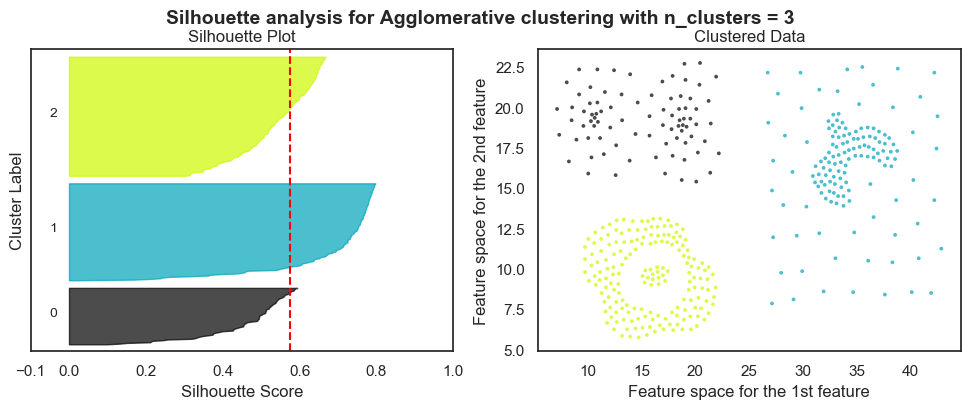

For K = 4, the average silhouette score is 0.550


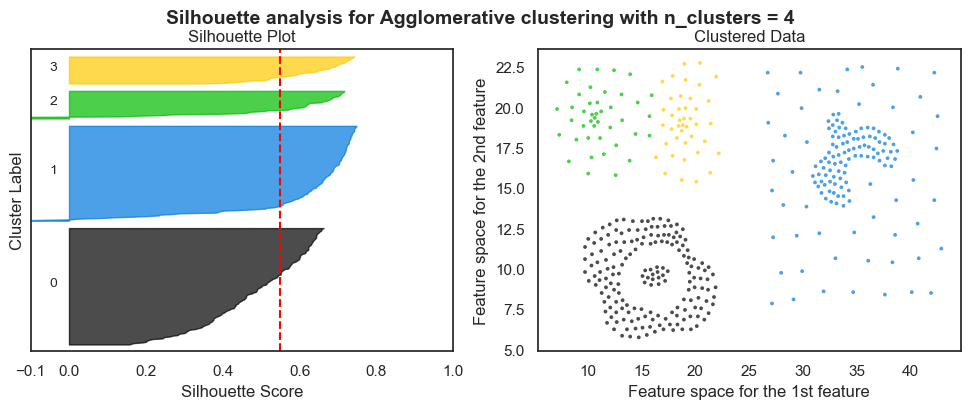

For K = 5, the average silhouette score is 0.510


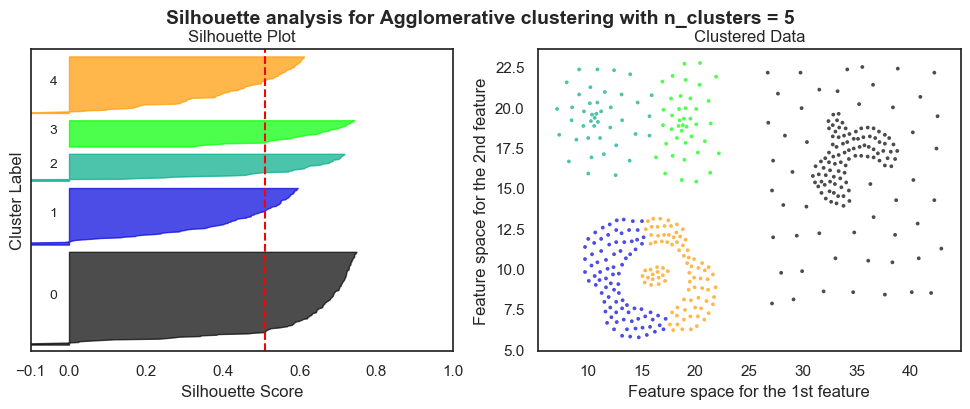

For K = 6, the average silhouette score is 0.418


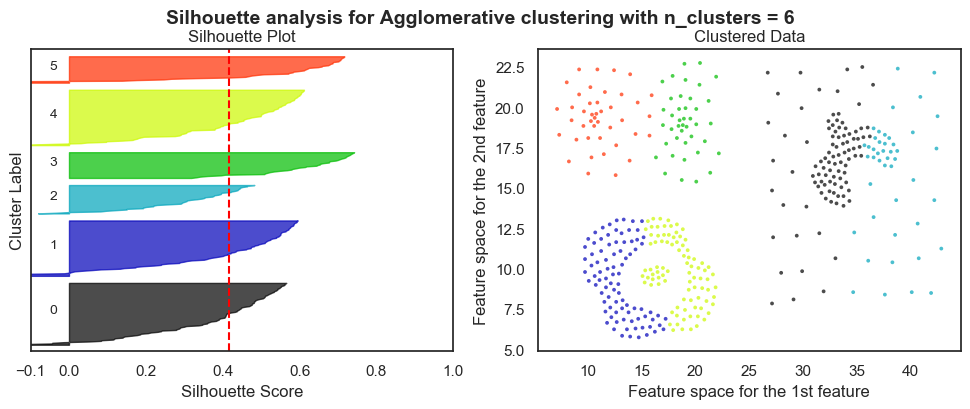

For K = 2, the average silhouette score is 0.453


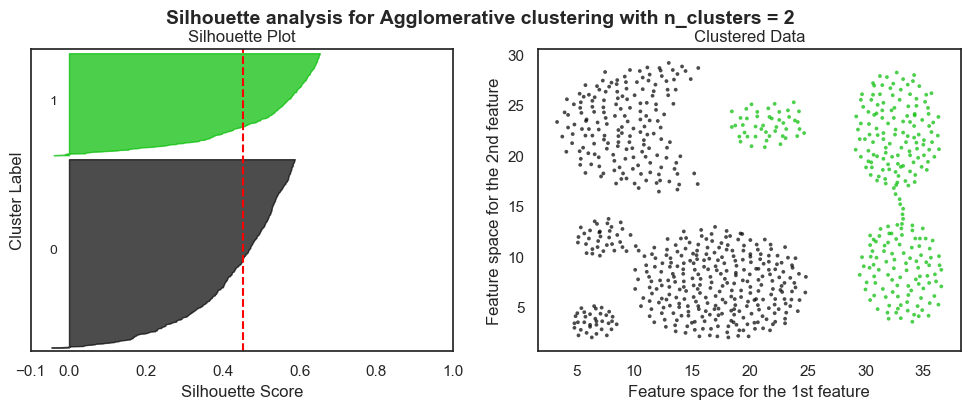

For K = 3, the average silhouette score is 0.512


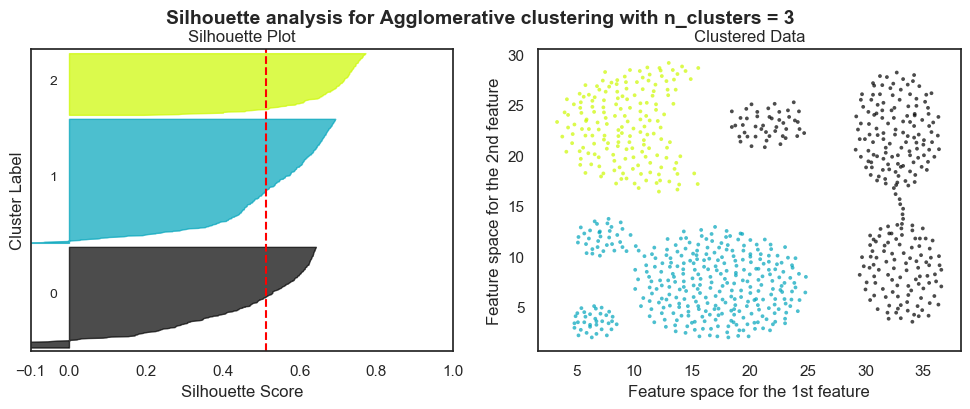

For K = 4, the average silhouette score is 0.522


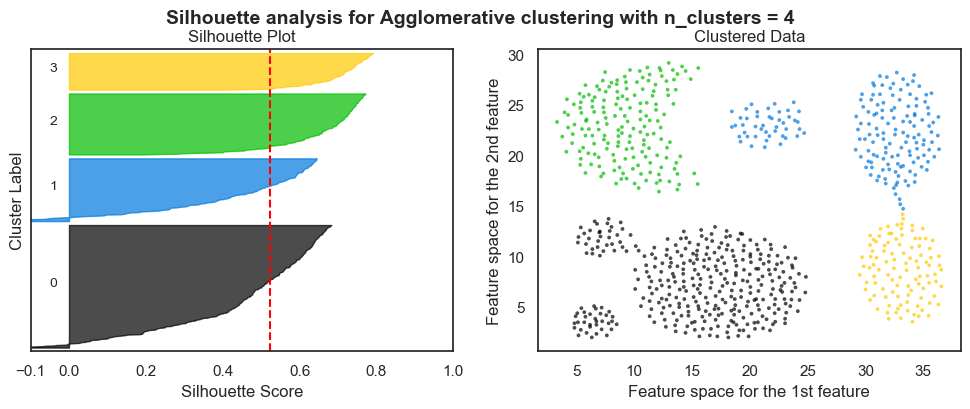

For K = 5, the average silhouette score is 0.501


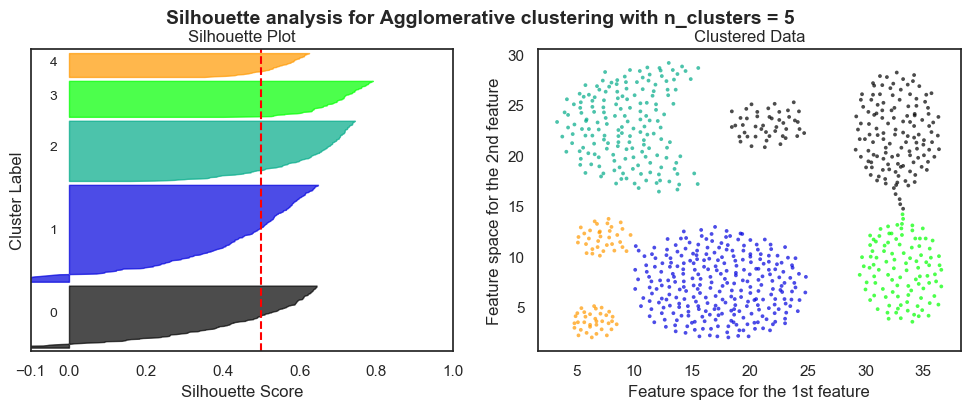

For K = 6, the average silhouette score is 0.512


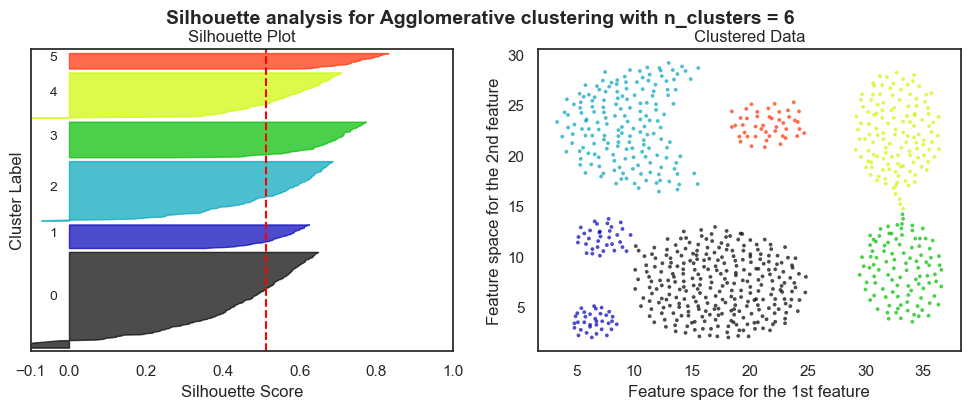

For K = 2, the average silhouette score is 0.510


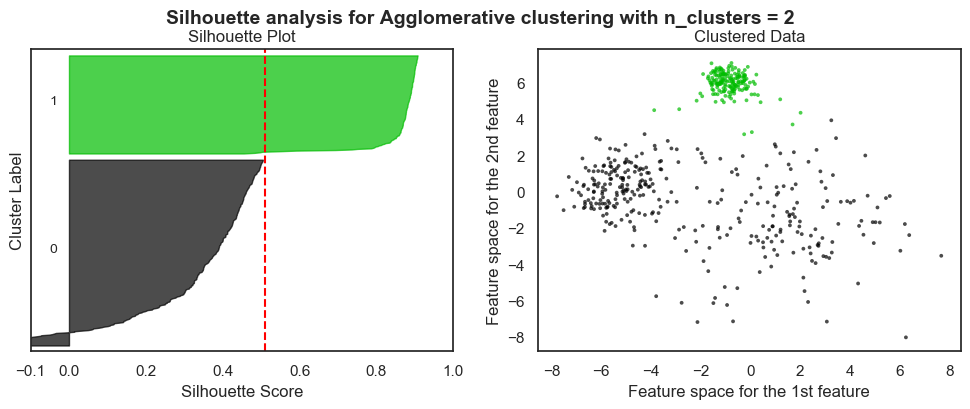

For K = 3, the average silhouette score is 0.651


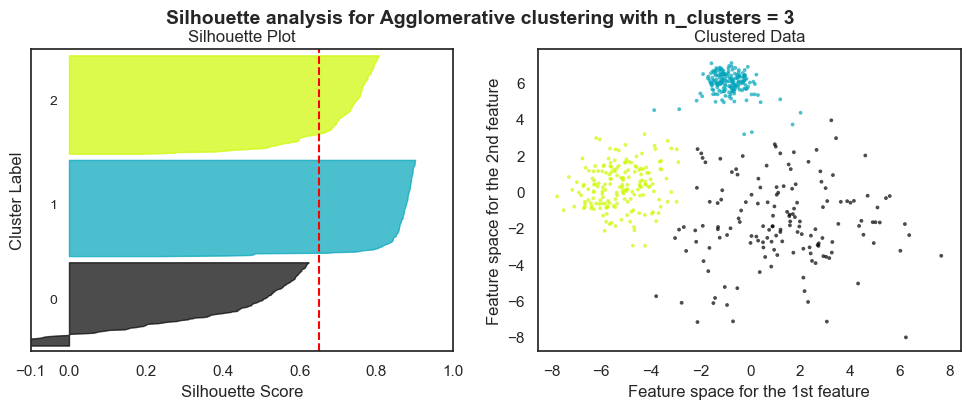

For K = 4, the average silhouette score is 0.592


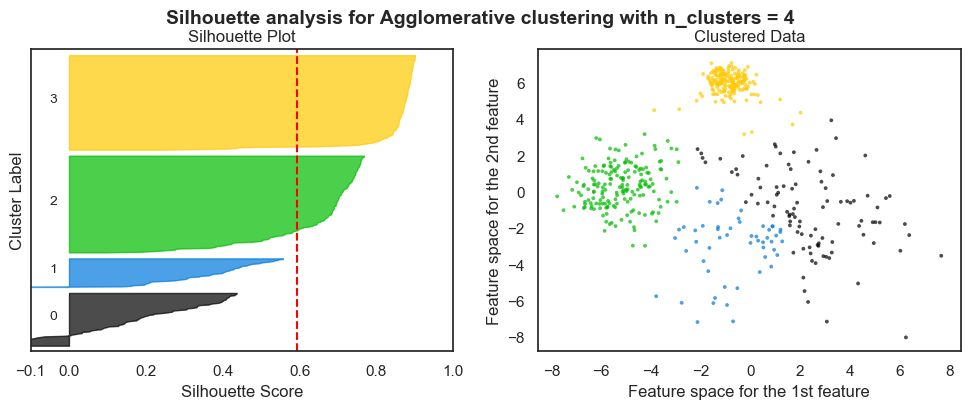

For K = 5, the average silhouette score is 0.602


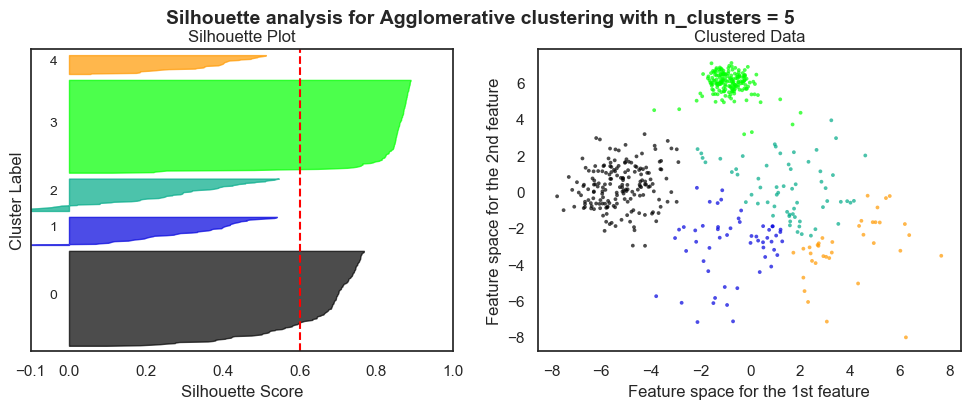

For K = 6, the average silhouette score is 0.485


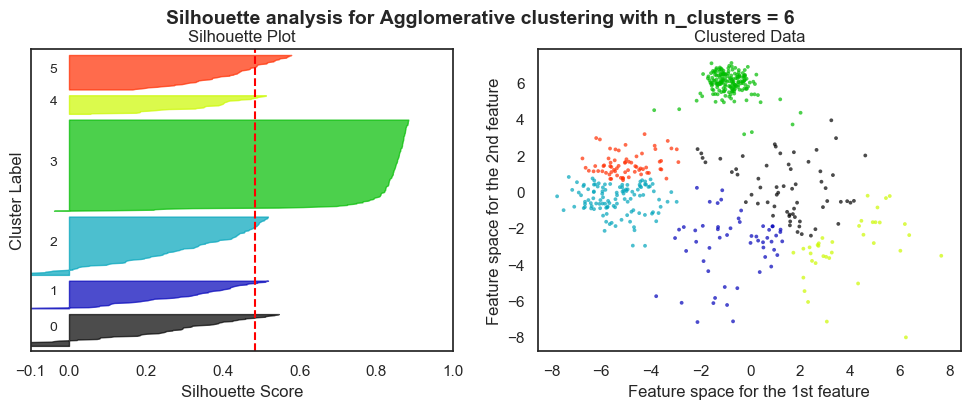

In [31]:
sil_agg(dataset_3)
sil_agg(dataset_4)
sil_agg(dataset_5)

In [49]:
def den(df):
    X=feature_matrix(df)

    import scipy.cluster.hierarchy as shc

    #plt.figure(figsize=(50, 100))
    fig = plt.figure(figsize=(60, 100), dpi=100)
    ax1 = fig.add_subplot(1, 1, 1)
    dend = shc.dendrogram(shc.linkage(X, method='ward'))
    #ax1.set_title("Dendograms depicting the order of agglomerative clustering")
    ax1.set_xlabel("Feature space for the 1st feature")
    ax1.set_ylabel("Feature space for the 2nd feature"fontsize=100, fontweight='bold')

    plt.suptitle("Dendogram for the cluster.",
                 fontsize=100, fontweight='bold')

    plt.show()

SyntaxError: invalid syntax (<ipython-input-49-862edb5a2130>, line 12)

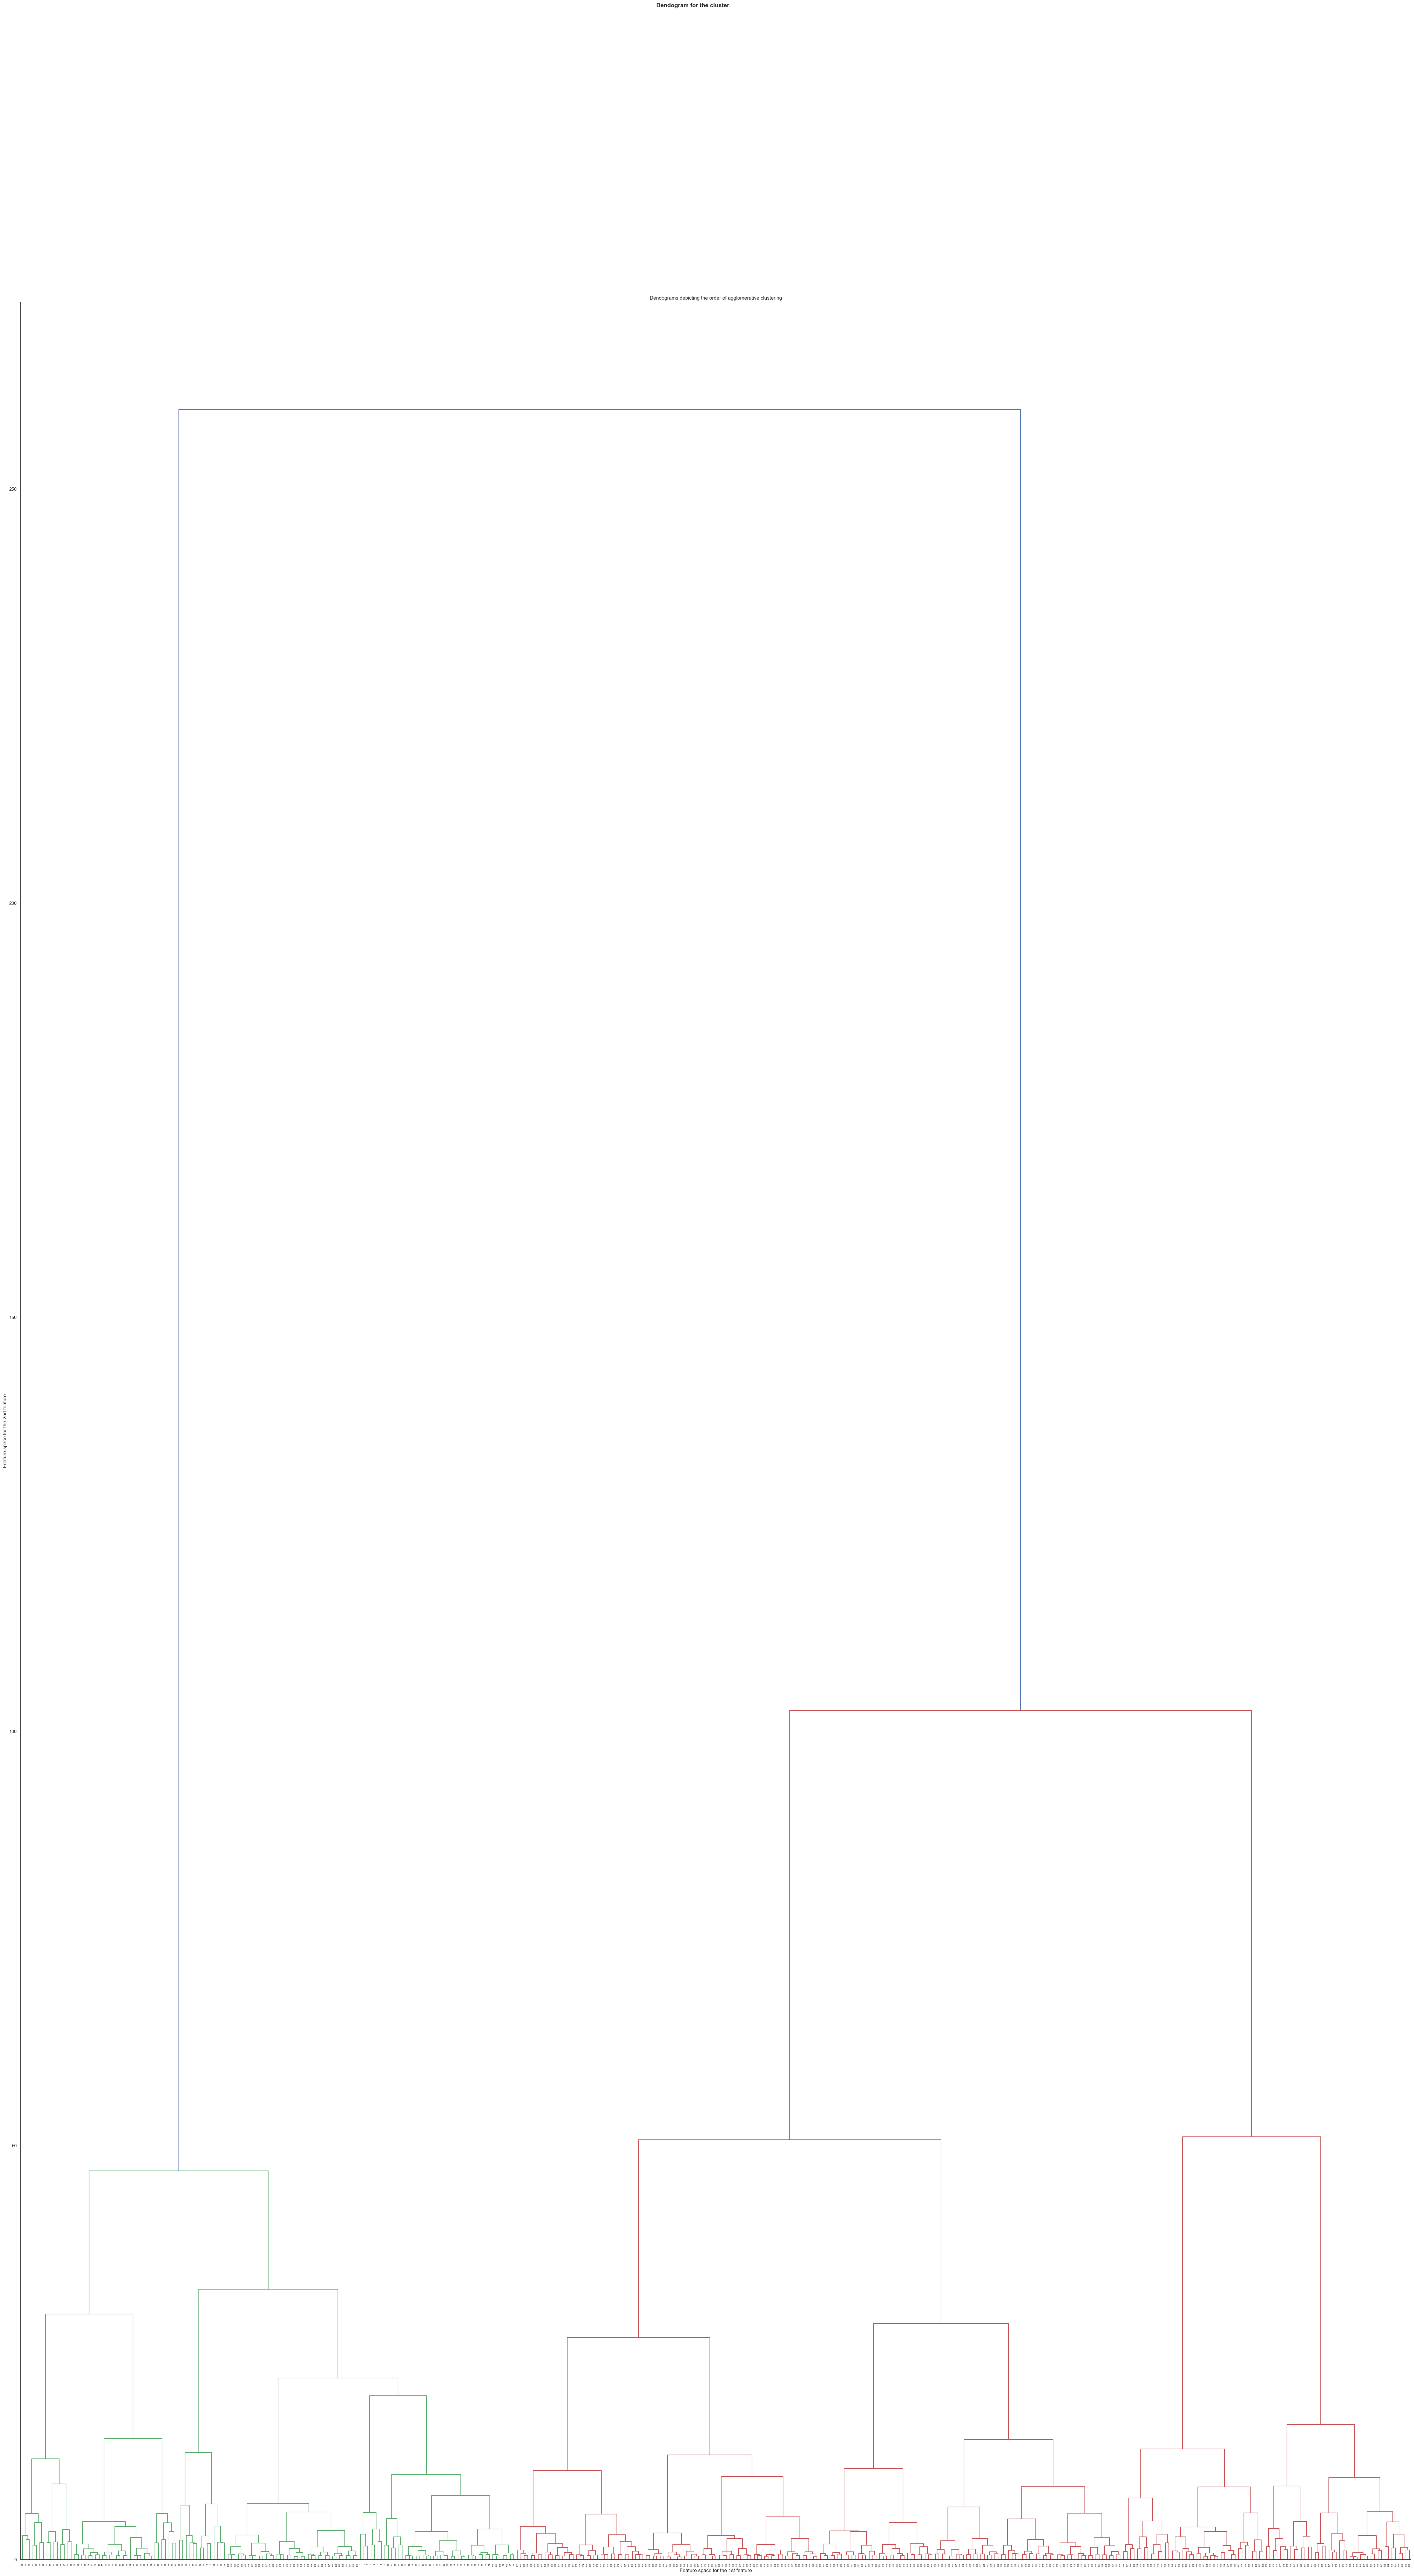

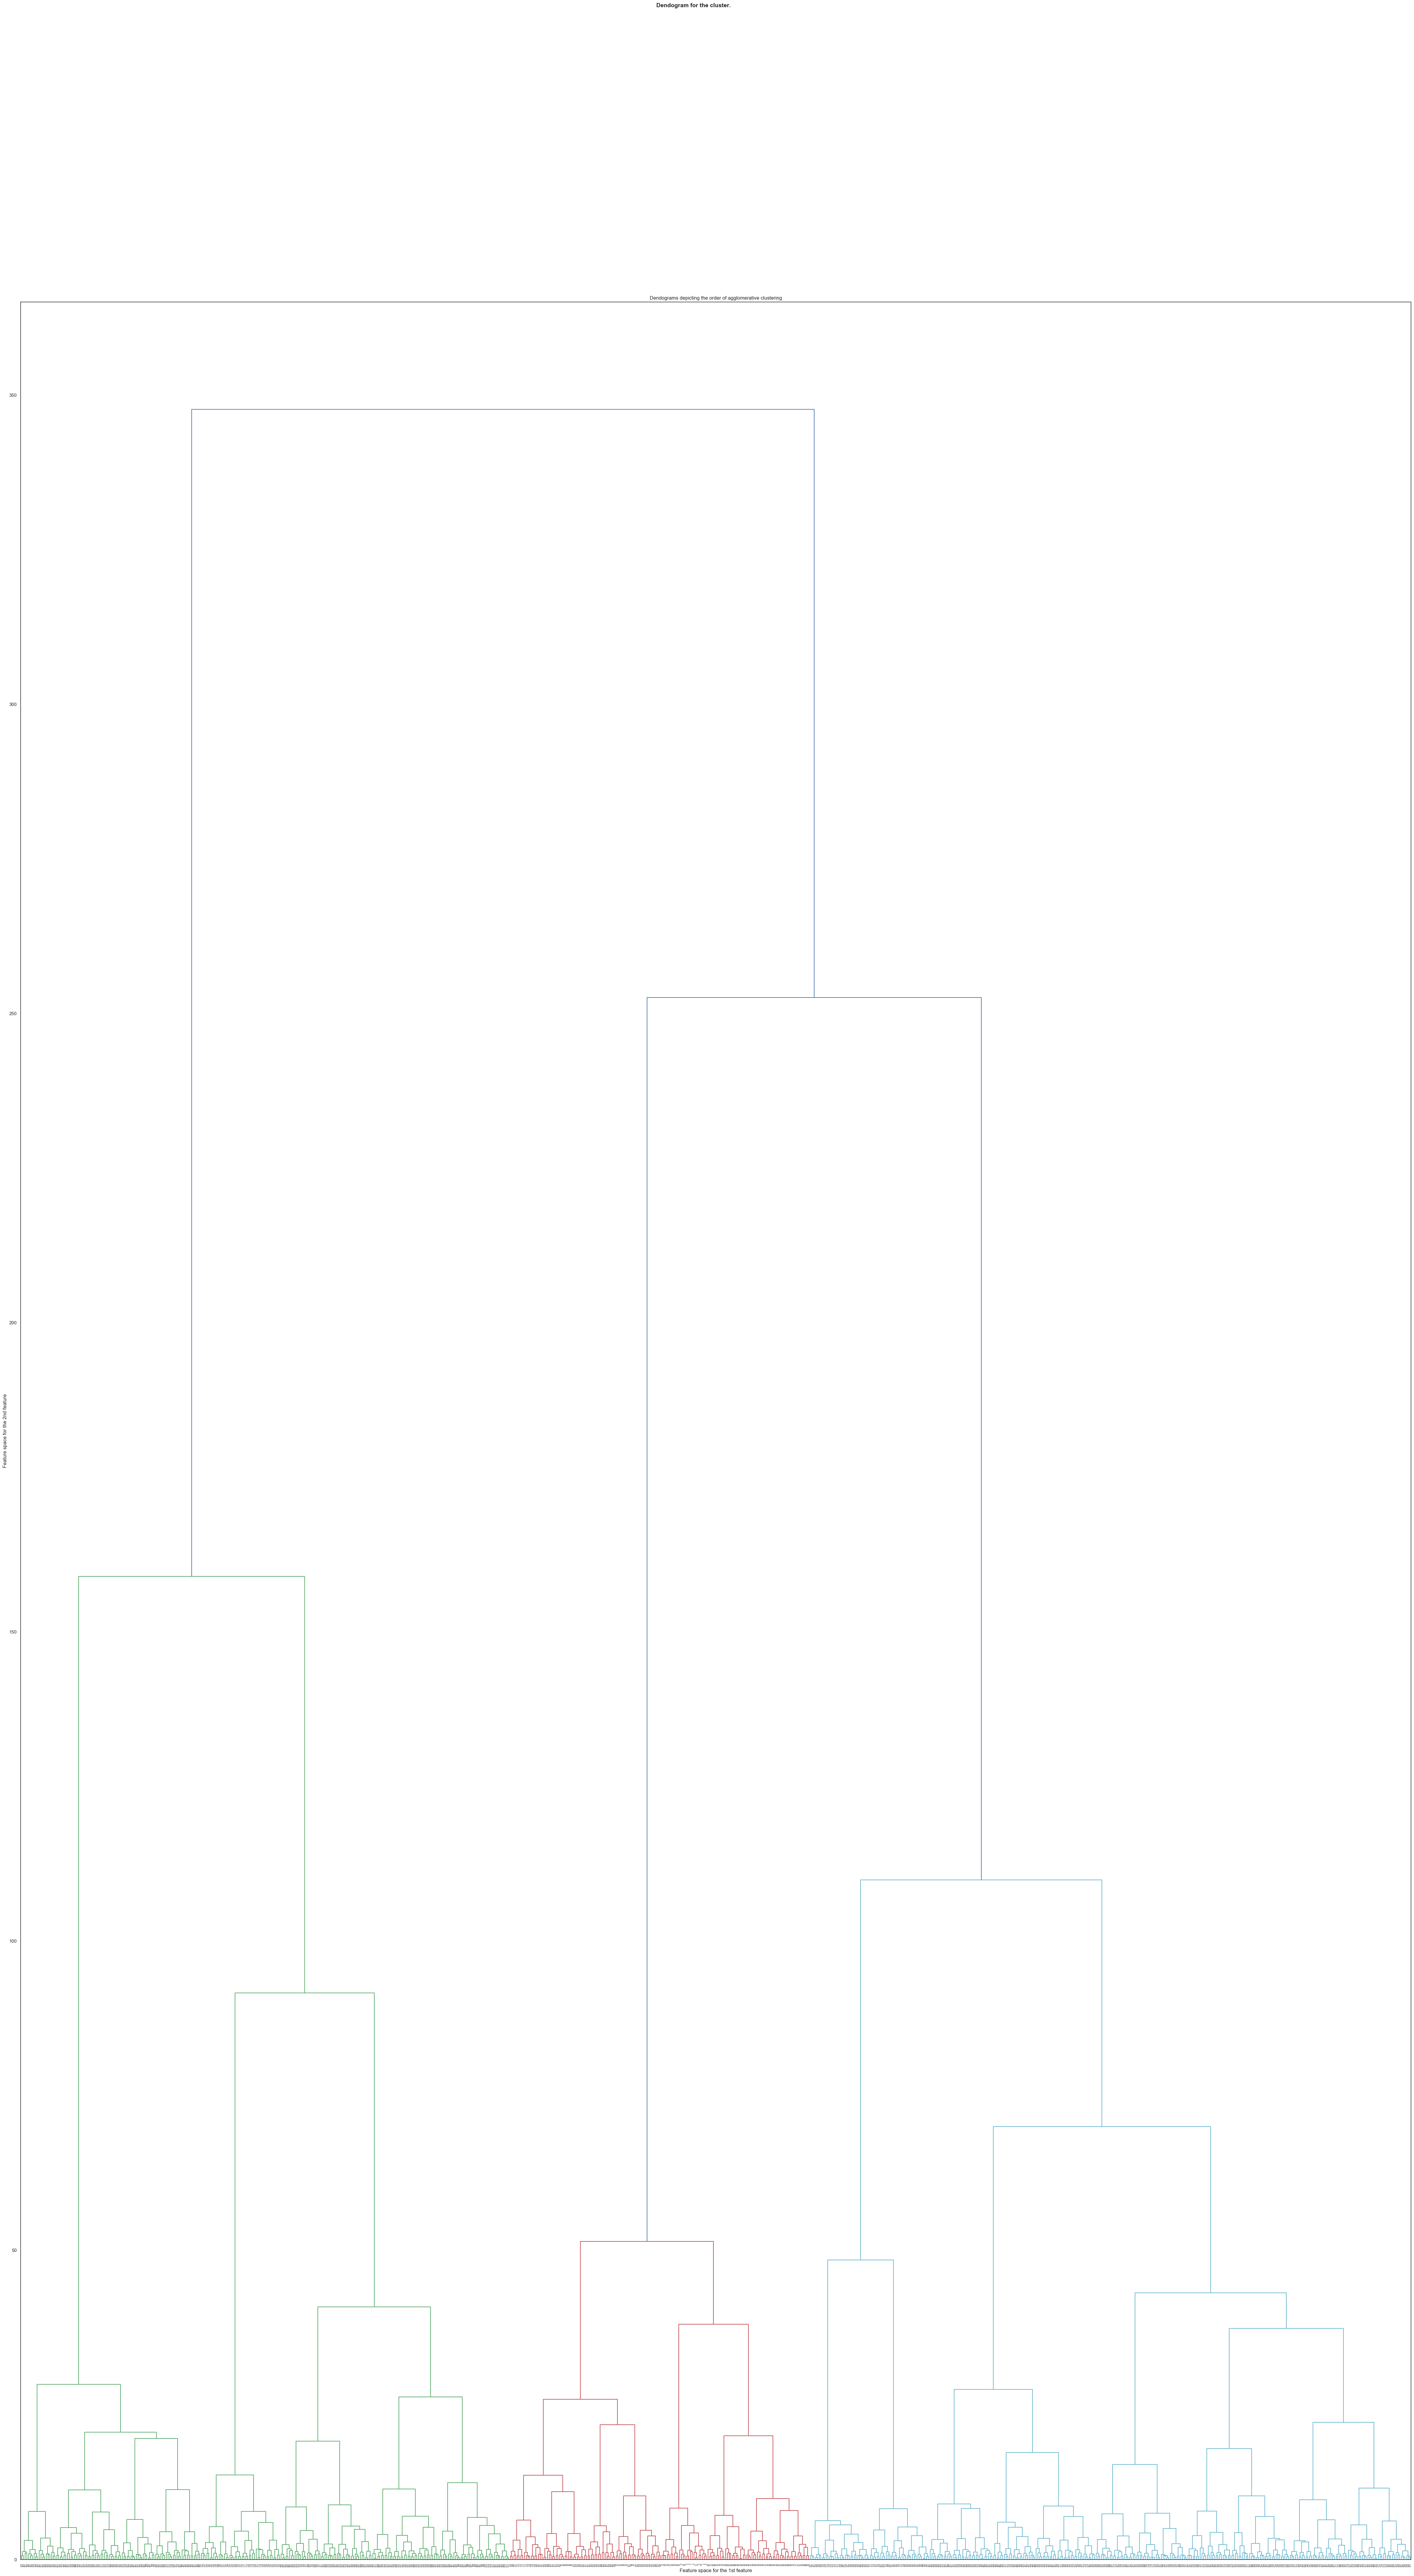

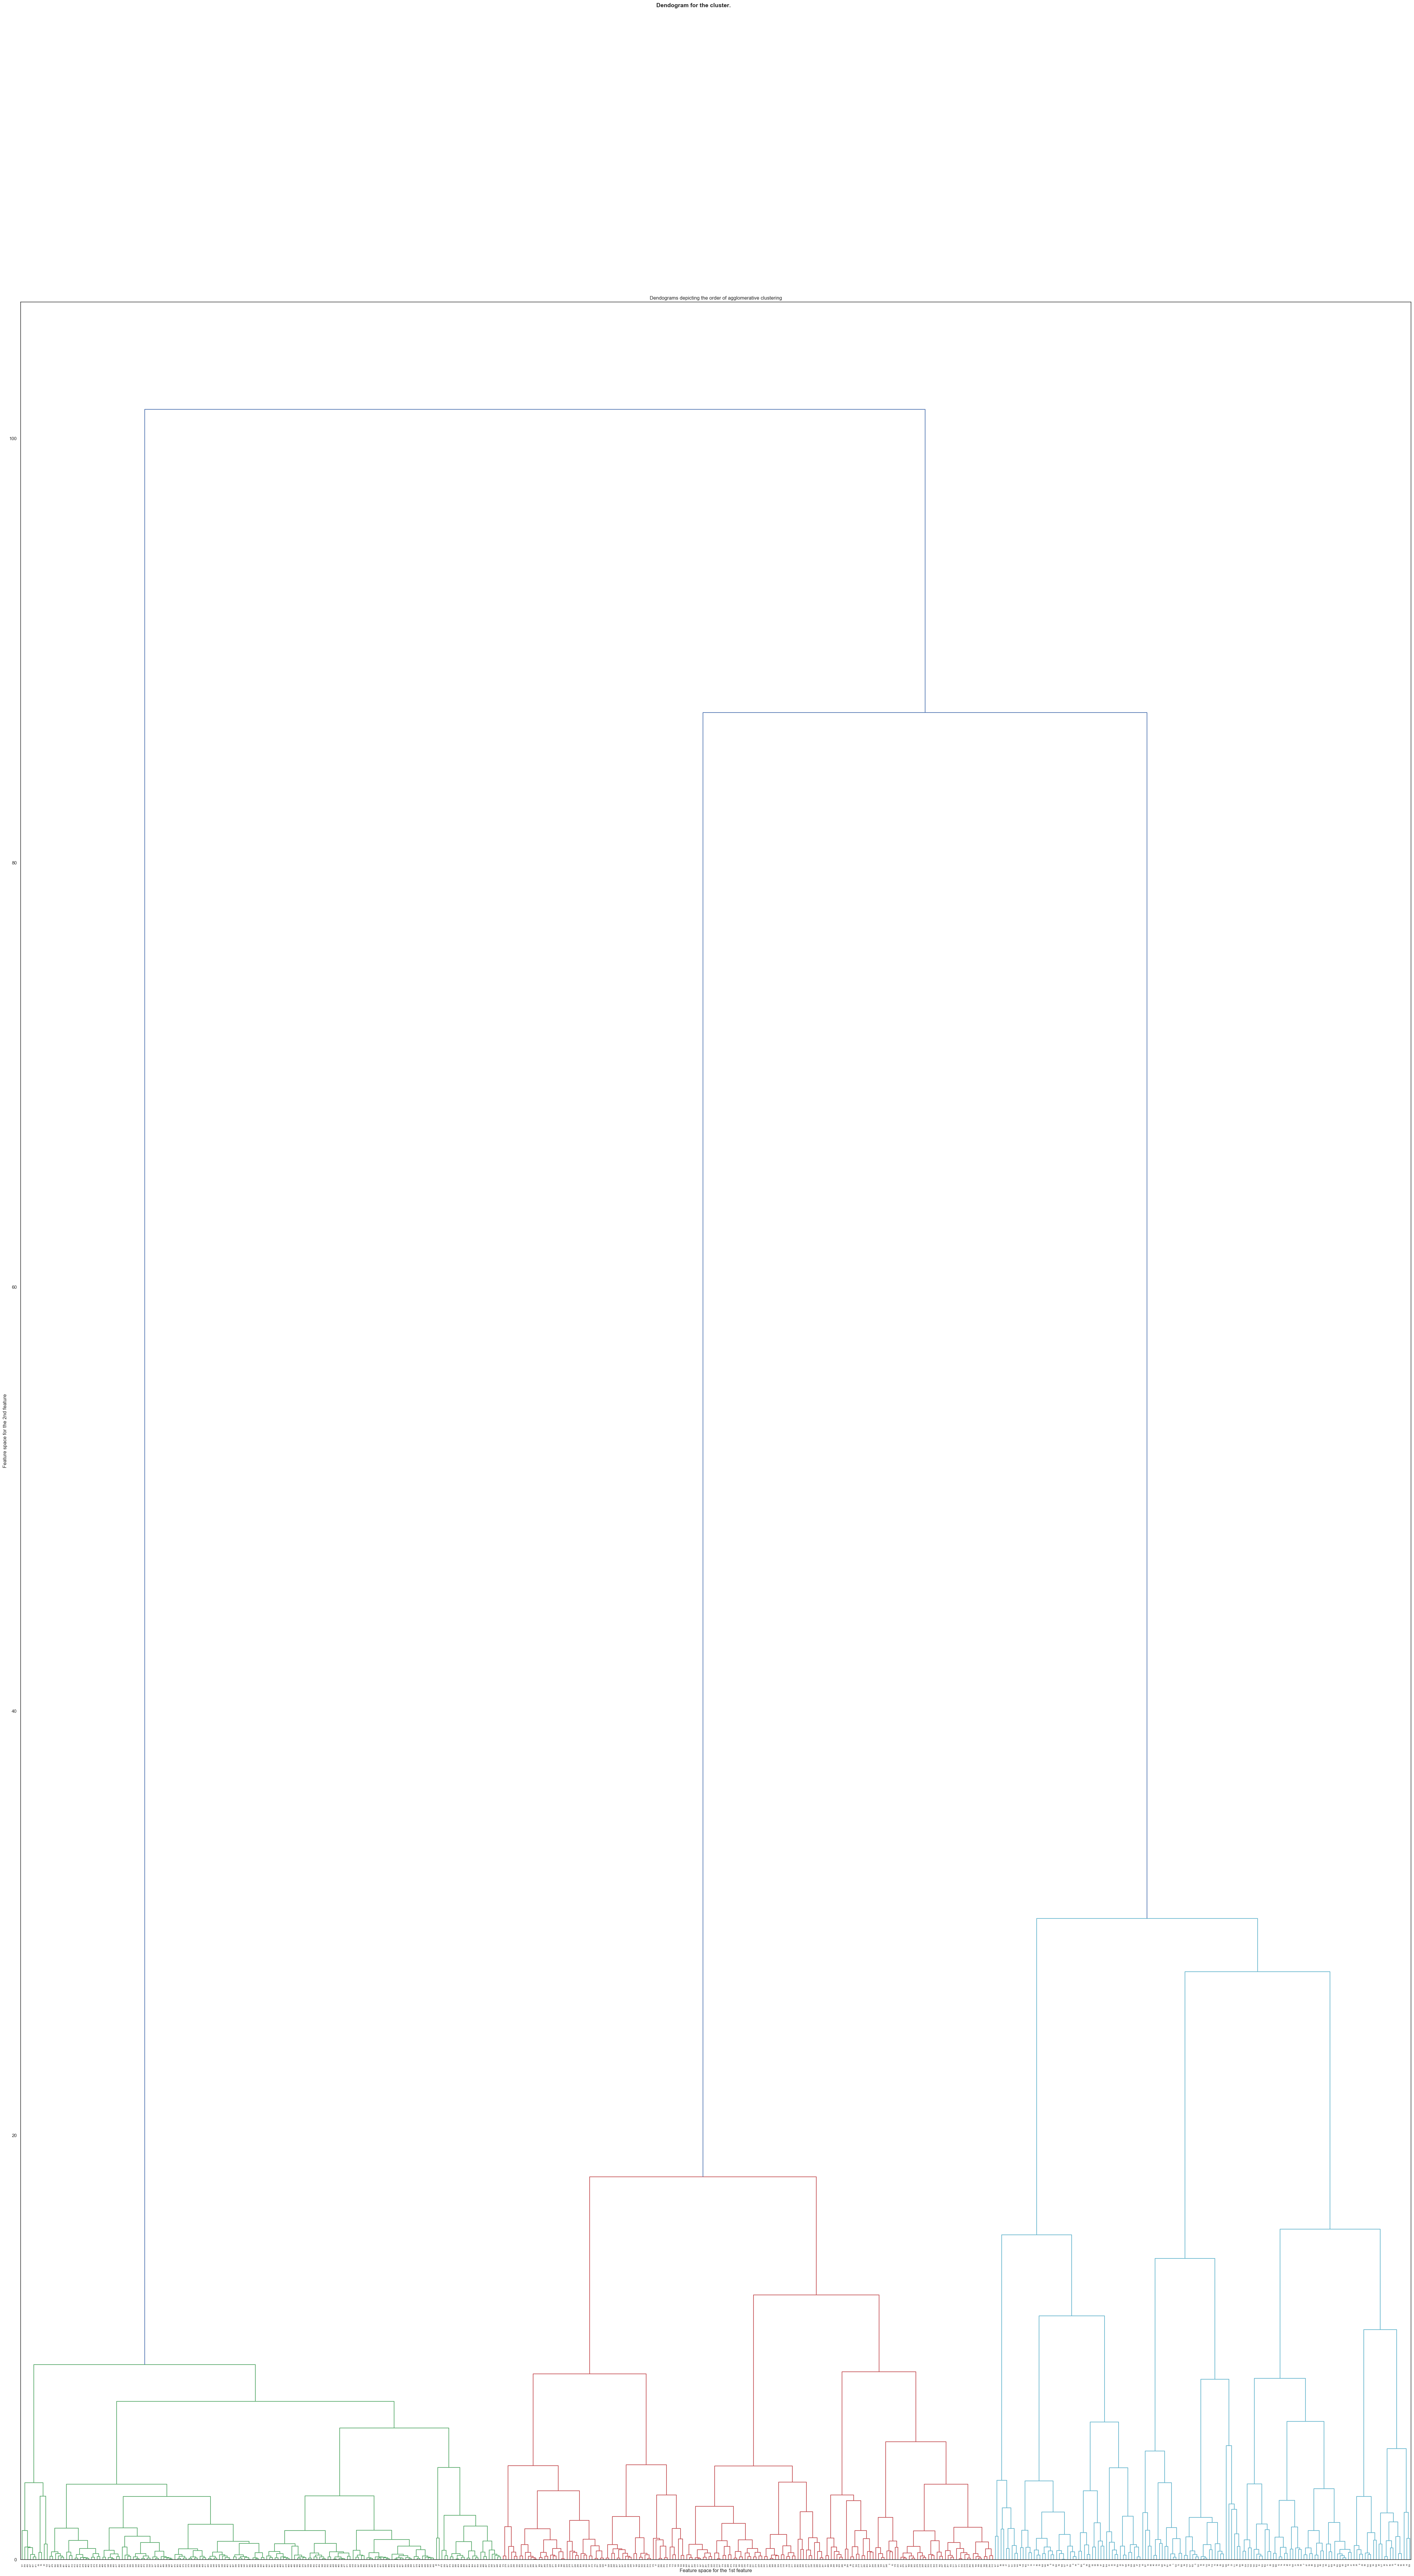

In [48]:
den(dataset_3)
den(dataset_4)
den(dataset_5)